# Credit Card Customers Analysis
by Alejo, Cuizon, & Sarabia <br>
APAC Manila EO&T Summer Analysts <br>
Created June 2023 <br>
<br>
Data from Kaggle: Credit Card Customers by Sakshi Goyal from https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers


## Sections
1. Introduction
    1. About the Data
    1. Questions
    1. Hypotheses
1. Import
1. Describe
1. Pre-process
1. Analyze
    1. method 1
    1. method 2
1. Other Techniques
    1. statistic 1
    1. statistic 2
    1. machine learning 1
    1. machine learning 2
1. Story Conclusion
    1. (maybe we can try to animate if kaya)
1. References (if any)

## I. Introduction


### About the Data
The dataset being used is taken from Kaggle from Sakshi Goyal's [Credit Card Customers](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers) which was taken from [Leaps Analytica](https://leaps.analyttica.com/).
The dataset contains 10.1k entries of credit card customers with their age, salary, relationships, credit card related information, and others.


### Questions


1. What are the factors
1. What shows


### Hypotheses
1. Blabla are determinants
1. Marital status are correlated with


## II. Import

In [71]:
!pip install pandas
!pip install scikit-learn
!pip install statsmodels


[notice] A new release of pip available: 22.1.2 -> 23.1.2
[notice] To update, run: C:\Users\mttal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 23.1.2
[notice] To update, run: C:\Users\mttal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 23.1.2
[notice] To update, run: C:\Users\mttal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [72]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lm

In [73]:
# import data
dataframe = pd.read_csv('BankChurners.csv')

## III. Describe

In [74]:
dataframe.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


## IV. Pre-process

In [75]:
# drop last 2 columns
dataframe = dataframe.iloc[:, :-2]
dataframe.count()

CLIENTNUM                   10127
Attrition_Flag              10127
Customer_Age                10127
Gender                      10127
Dependent_count             10127
Education_Level             10127
Marital_Status              10127
Income_Category             10127
Card_Category               10127
Months_on_book              10127
Total_Relationship_Count    10127
Months_Inactive_12_mon      10127
Contacts_Count_12_mon       10127
Credit_Limit                10127
Total_Revolving_Bal         10127
Avg_Open_To_Buy             10127
Total_Amt_Chng_Q4_Q1        10127
Total_Trans_Amt             10127
Total_Trans_Ct              10127
Total_Ct_Chng_Q4_Q1         10127
Avg_Utilization_Ratio       10127
dtype: int64

In [76]:
# Clean bad data (NA, unrealistic, etc)

dataframe.dropna()
dataframe.drop_duplicates()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [77]:
print(dataframe['Education_Level'].unique())
print(dataframe['Dependent_count'].unique())
print(dataframe['Card_Category'].unique())
print(dataframe['Marital_Status'].unique())

['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
[3 5 4 2 0 1]
['Blue' 'Gold' 'Silver' 'Platinum']
['Married' 'Single' 'Unknown' 'Divorced']


In [78]:
dataframe = dataframe[dataframe['Education_Level'].isin(['Unknown']) == False]
dataframe = dataframe[dataframe['Marital_Status'].isna() == False]
dataframe

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [79]:
# Normalize data via MinMaxScaler



## V. Analyze

### a. Basic Linear Regression

0.00011152801612279717


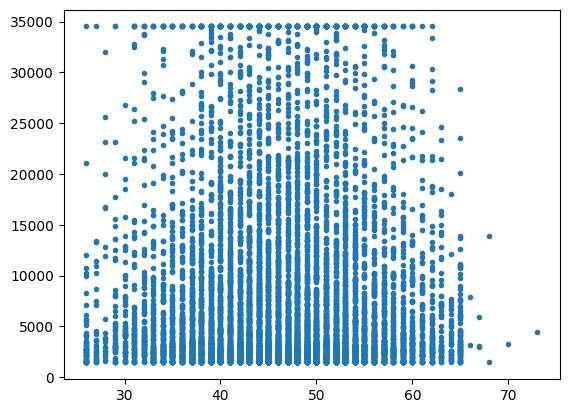

In [84]:
# Method 1

x = dataframe['Customer_Age'].values.reshape((-1,1))
x_1 = dataframe['Customer_Age'].values
y = dataframe['Credit_Limit'].values

initial_lm = lm().fit(x,y)

print(initial_lm.score(x,y))

plt.scatter(list(x_1),list(y), marker=".")

No significance

### b. Method 2

In [81]:
# Method 2



## VI. Other Techniques

### a. statistic/machine learning 1

In [82]:
# Other technique 1

## VII. Story Conclusion

In [83]:
# try to animate? or at least show the data in a graph

## VIII. References